## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2018, 12, 31)

df = web.DataReader('AAPL', 'yahoo', start_date, end_date)

plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price')
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

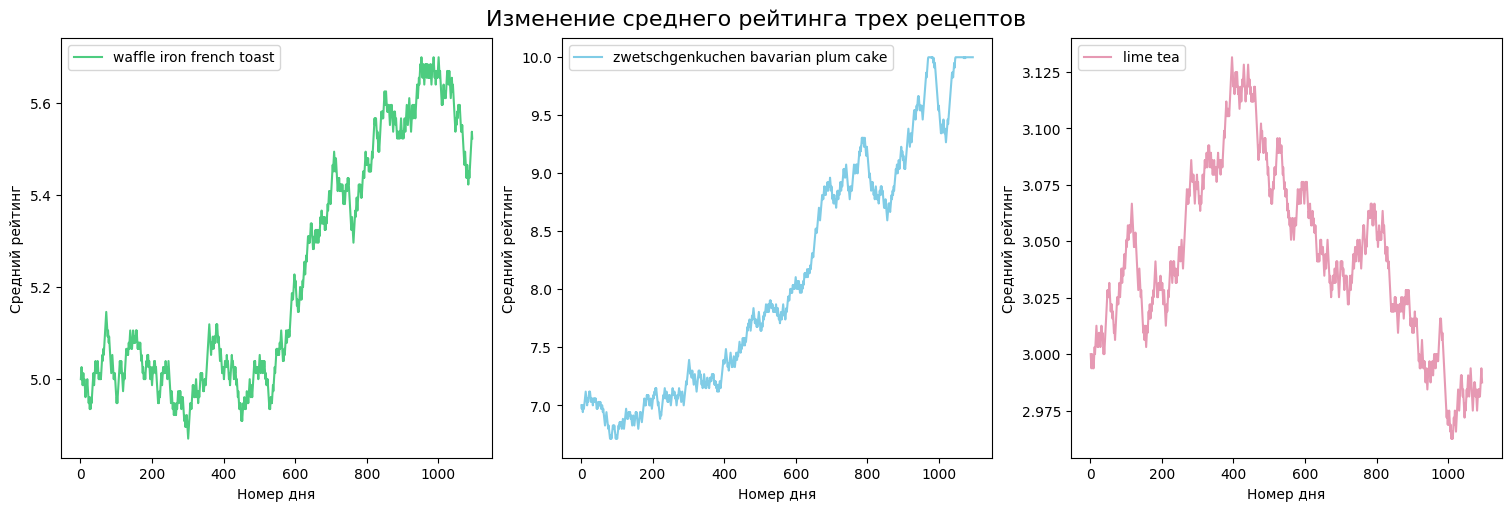

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# load the data from the file
data = np.load('average_ratings.npy')

rt1 = [elem for elem in data[0]]
d1 = [d for d in range(1, len(data[0])+1)]
rt2 = [elem for elem in data[1]]
d2 = [d for d in range(1, len(data[1])+1)]
rt3 = [elem for elem in data[2]]
d3 = [d for d in range(1, len(data[2])+1)]

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5), layout='constrained')
fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize=16)

ax1.plot(d1, rt1, color= (0.3, 0.8, 0.5), label="waffle iron french toast")
ax1.set_xlabel('Номер дня')
ax1.set_ylabel('Средний рейтинг')
ax1.legend(loc="upper left")

ax2.plot(d2, rt2, label="zwetschgenkuchen bavarian plum cake", color= (0.5, 0.8, 0.9))
ax2.set_xlabel("Номер дня")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc="upper left")

ax3.plot(d3, rt3, label="lime tea", color= (0.9, 0.6, 0.7))
ax3.set_xlabel("Номер дня")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(loc="upper left")


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [4]:
data = pd.date_range(start='1/1/2019', end='12/30/2021')

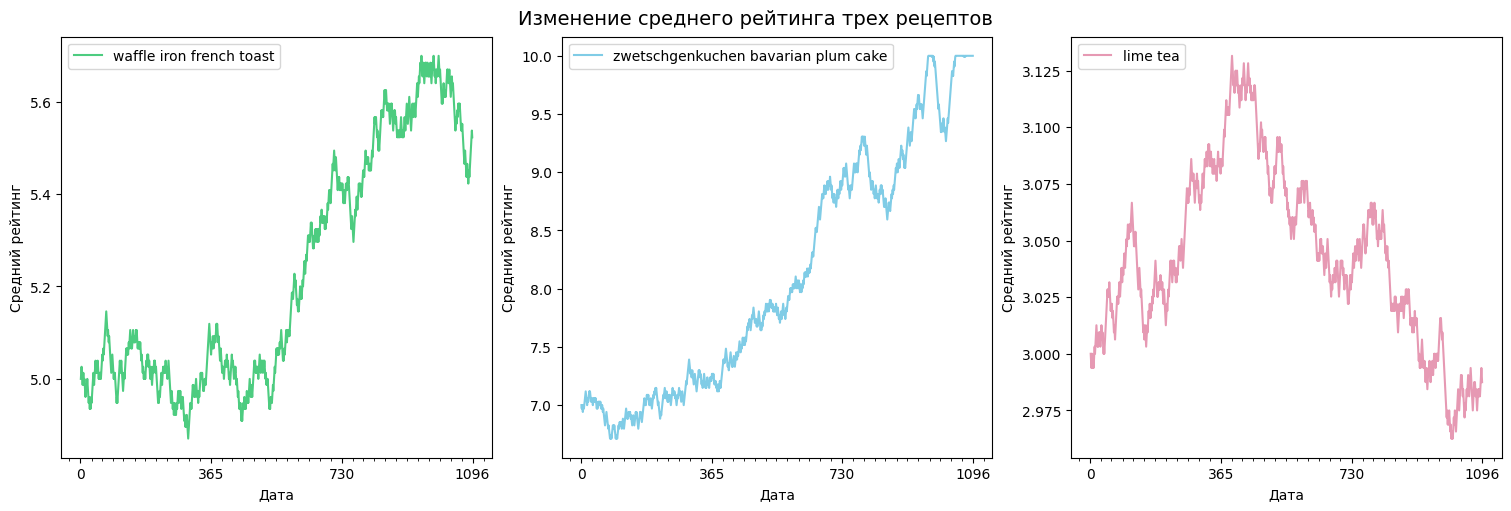

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5), layout='constrained')
fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize=14)

ax1.plot(d1, rt1, color= (0.3, 0.8, 0.5), label="waffle iron french toast")
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(loc="upper left")

ax2.plot(d2, rt2, label="zwetschgenkuchen bavarian plum cake", color= (0.5, 0.8, 0.9))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc="upper left")

ax3.plot(d3, rt3, label="lime tea", color= (0.9, 0.6, 0.7))
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.set_xlabel("Дата")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(loc="upper left")


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

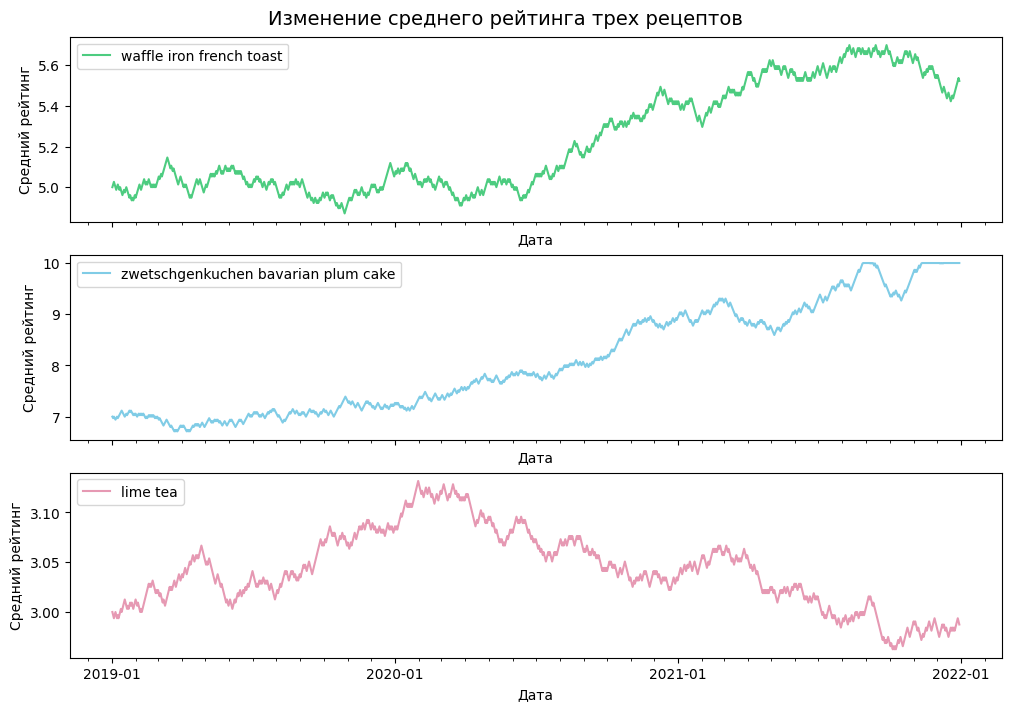

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 7), layout='constrained', sharex='col')
fig.suptitle("Изменение среднего рейтинга трех рецептов", fontsize=14)

ax1.plot(data, rt1, color= (0.3, 0.8, 0.5), label="waffle iron french toast")
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(loc="upper left")

ax2.plot(data, rt2, label="zwetschgenkuchen bavarian plum cake", color= (0.5, 0.8, 0.9))
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc="upper left")

ax3.plot(data, rt3, label="lime tea", color= (0.9, 0.6, 0.7))
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.set_xlabel("Дата")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(loc="upper left")

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0, 0.5, 'Число посетителей')

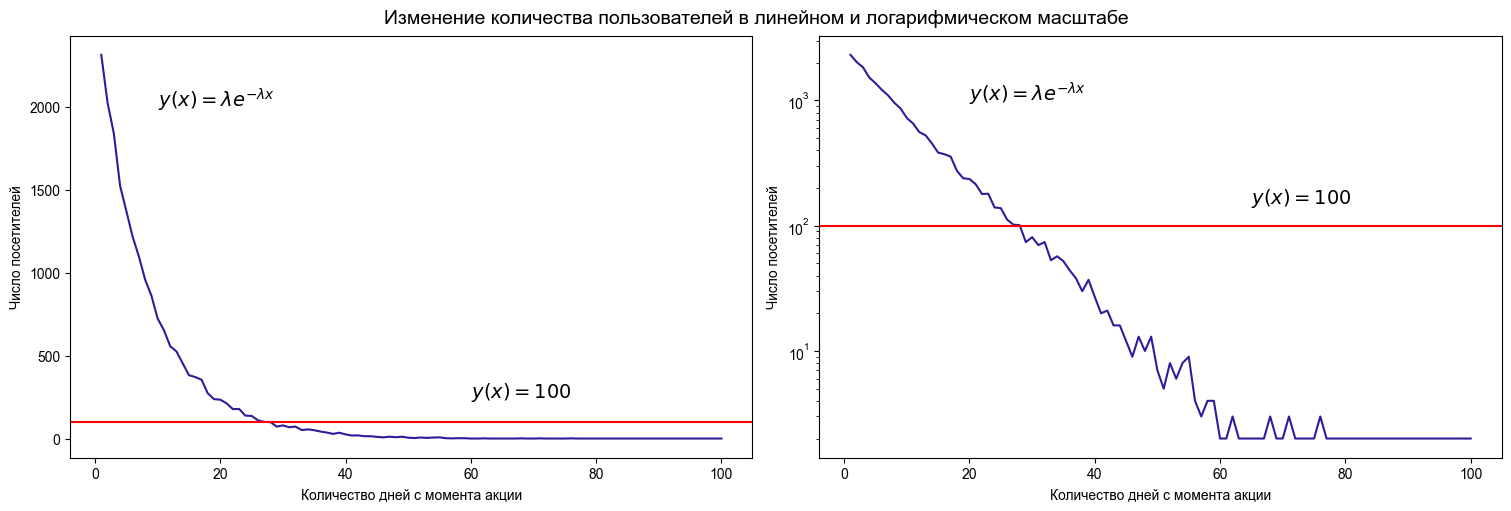

In [48]:
b = np.load('visitors.npy')
num1 = [elem for elem in b]
d1 = [d for d in range(1, len(b)+1)]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), layout='constrained')
fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=14)

ax1.plot(d1, num1, color=(0.2, 0.1, 0.6))
ax1.axhline(y = 100, color= 'r')
ax1.text(10, 2000, '$y(x) = \lambda e^{-\lambda x}$', fontsize=14)

ax1.text(60, 250,'$y(x)=100$', fontsize=14)
ax1.set_xlabel("Количество дней с момента акции")
ax1.set_ylabel("Число посетителей")

ax2.plot(d1, num1, color=(0.2, 0.1, 0.6))
ax2.text(20, 1000,'$y(x) = \lambda e^{-\lambda x}$', fontsize=14)
ax2.set_yscale("log")
ax2.text(65, 150,'$y(x)=100$', fontsize=14)
ax2.axhline(y = 100, color = 'r')
ax2.set_xlabel("Количество дней с момента акции")
ax2.set_ylabel("Число посетителей")

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [49]:
recipes = pd.read_csv('recipes_sample.csv', index_col=0)
reviews = pd.read_csv('reviews_sample.csv', index_col=0)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

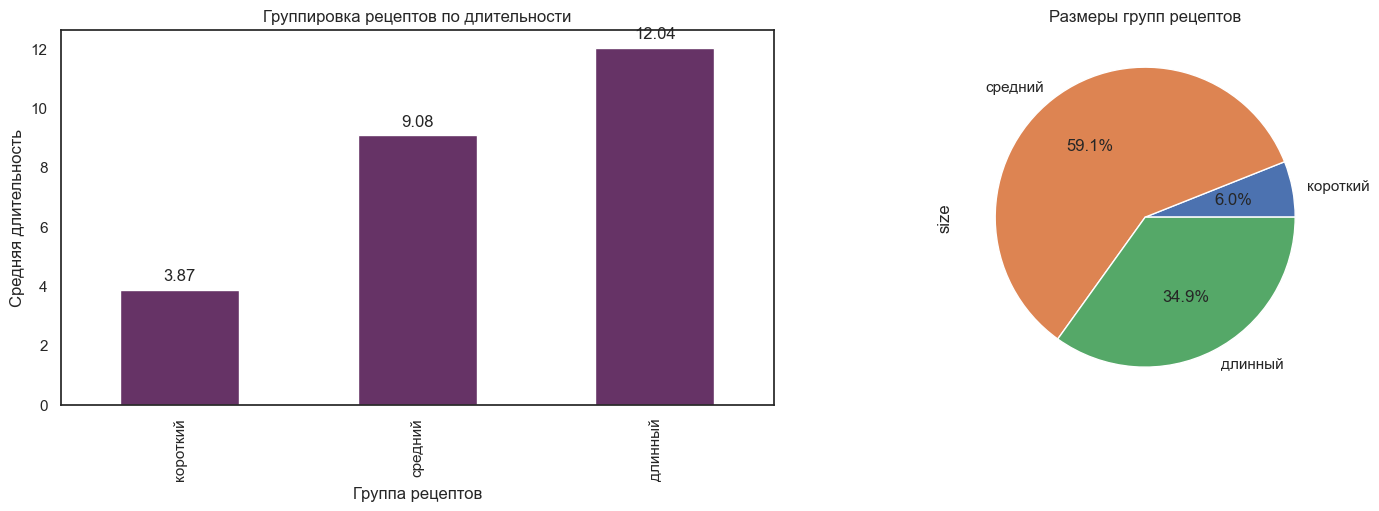

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a new column for recipe duration category
duration_bins = [0, 5, 50, recipes['minutes'].max()]
duration_labels = ['короткий', 'средний', 'длинный']
recipes['duration'] = pd.cut(recipes['minutes'], bins=duration_bins, labels=duration_labels)

# Group recipes by duration category and calculate average steps and count
recipe_groups = recipes.groupby('duration').agg({'n_steps': 'mean', 'id': 'count'}).rename(columns={'id': 'size'})


fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), layout='constrained')

ax1 = recipe_groups['n_steps'].plot(kind='bar', ax=ax1, color= (0.4, 0.2, 0.4))
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax1.set_title('Группировка рецептов по длительности')


for i, v in enumerate(recipe_groups['n_steps']):
    ax1.annotate(str(round(v, 2)), xy=(i, v + 0.2), ha='center', va='bottom')

ax2 = recipe_groups.plot(kind='pie', y='size', legend=False, autopct='%1.1f%%', ax=ax2)
ax2.set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

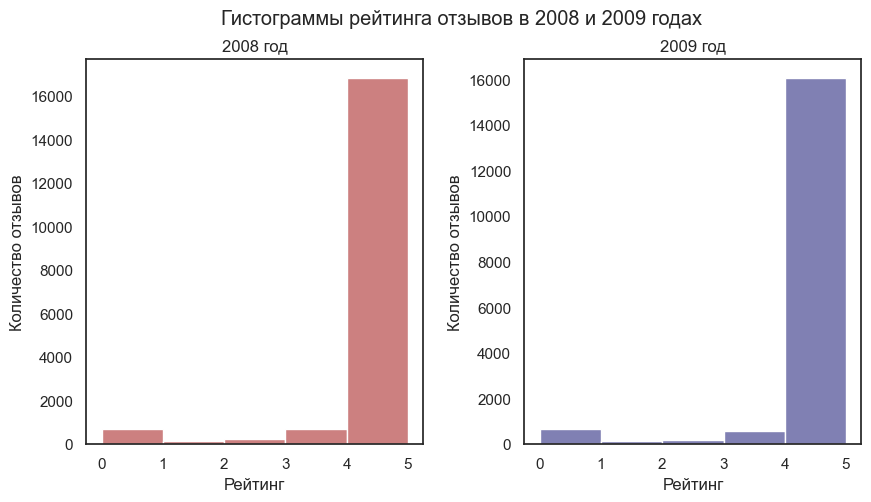

In [121]:
reviews['date'] = pd.to_datetime(reviews.date, format='%Y-%m-%d')
reviews_08_09 = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

merged_df = pd.merge(reviews_08_09, recipes, left_on='recipe_id', right_on='id')

df_2008 = merged_df[merged_df['date'].dt.year == 2008]

df_2009 = merged_df[merged_df['date'].dt.year == 2009]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

ax1.hist(df_2008['rating'], bins=5, color= (0.8, 0.5, 0.5))
ax2.hist(df_2009['rating'], bins=5, color= (0.5, 0.5, 0.7))

fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
ax1.set_title('2008 год')
ax2.set_title('2009 год')
ax1.set_xlabel('Рейтинг')
ax2.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество отзывов')
ax2.set_ylabel('Количество отзывов')

plt.subplots_adjust(wspace=0.3)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

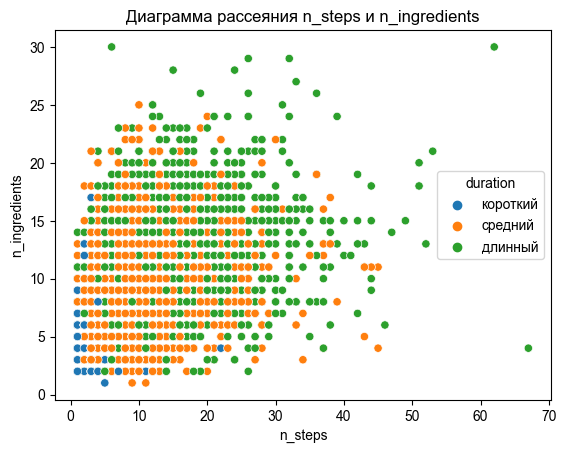

In [99]:
sns.scatterplot(x='n_steps', y='n_ingredients', hue='duration', data=recipes)

plt.title('Диаграмма рассеяния n_steps и n_ingredients')

plt.show()

Хорошо заметно, что чем меньше ингредиентов -- тем меньше длительность рецепта, а чем больше ингредиентов -- тем больше длительность рецепта.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

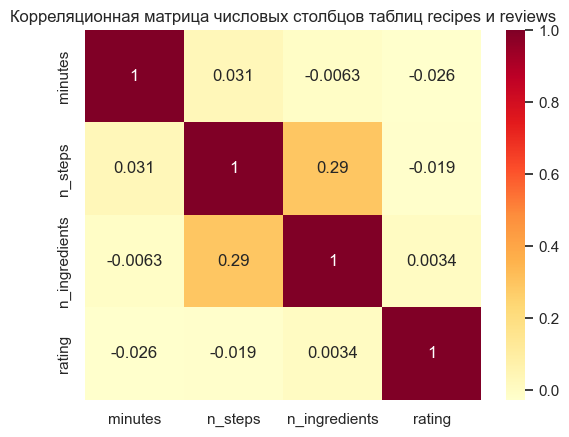

In [105]:
merged = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

cor_cols = ['minutes', 'n_steps', 'n_ingredients', 'rating']
cor_df = merged[cor_cols]

cor_matrix = cor_df.corr()

sns.set(style='white')
cmap = sns.color_palette('YlOrRd', as_cmap=True)
heatmap = sns.heatmap(cor_matrix, annot=True, cmap=cmap)

plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')

plt.show()